In [ ]:
# this notebook is for analyzing sensor signals for more effiecient and detailed testing
# to visualize data, make sure the serial output in arduino IDE corresponds to the structure of 
# the data parsing script below. then run the code in the IDE, close the serial monitor and run the code below.
 
import serial
import time
import numpy as np
import pandas as pd


# Open the serial port (replace 'COM8' the actual port and adjust baud rate)
ser = serial.Serial('COM9', 115200)  # Adjust the COM port and baud rate
time.sleep(2)  # Wait for the connection to initialize

# Initialize empty lists to store the data

meas_gyro_y = []
meas_gyro_z = []
gyro_y = []
gyro_z = []
#y_step = []
#x_step = []
_time = []


for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
    
print("COLLECTING DATA\n")


# Read 4000 samples from serial (adjust as needed)
start = time.perf_counter()
for i in range(1000):          # DATA PARSING 
    line = ser.readline().decode('utf-8').strip()  # Read line and decode it   
    values = line.split(',')  # Split the comma-separated data
    if len(values) == 5:  # Ensure there are exactly 6 values
        #print("data found")
        #accel_x.append(float(values[0]))
        #accel_y.append(float(values[1]))
        #accel_z.append(float(values[2]))
        #gyro_x.append(float(values[3]))
        meas_gyro_y.append(float(values[0]))
        meas_gyro_z.append(float(values[1]))
        gyro_y.append(float(values[2]))
        gyro_z.append(float(values[3]))
        #y_step.append(float(values[5]))
        #x_step.append(float(values[6]))
        _time.append(float(values[4]))
        
end = time.perf_counter()           
ser.close()  # Close the serial connection after reading data

print("finished data collection\n")

print(f"Elapsed time: {end - start:.8f} seconds")


3...2...1...COLLECTING DATA

finished data collection

Elapsed time: 4.55925970 seconds


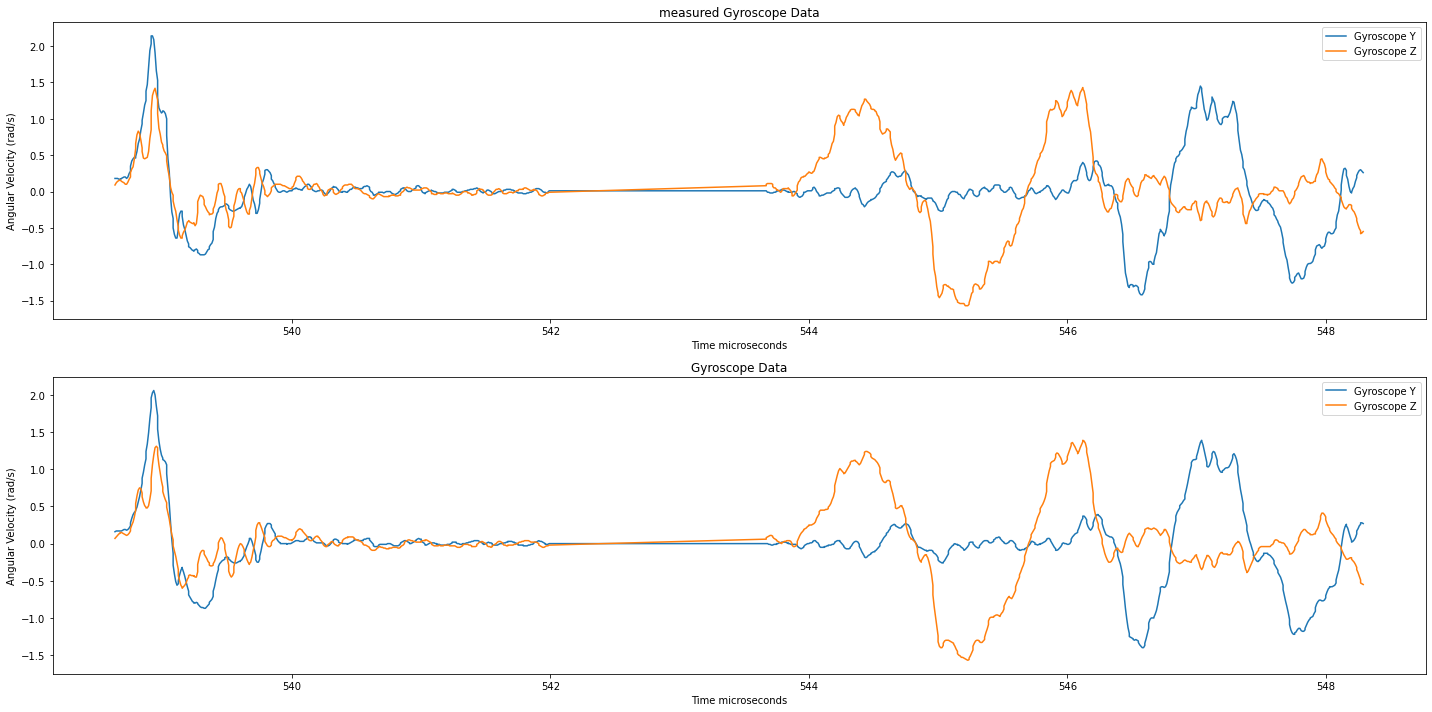

In [24]:
import matplotlib.pyplot as plt

# Plot Accelerometer Data
plt.figure(figsize=(20, 10))

# Accelerometer Data
#plt.subplot(3, 1, 1)
#plt.plot(_time,accel_x, label='Accelerometer X')
#plt.plot(_time,accel_y, label='Accelerometer Y')
#plt.plot(_time,accel_z, label='Accelerometer Z')
#plt.title('Accelerometer Data')
#plt.xlabel('Time microseconds')
#plt.ylabel('Acceleration (m/s^2)')
#plt.legend()

# measured Gyroscope Data
plt.subplot(2, 1, 1)
#plt.plot(_time,gyro_x, label='Gyroscope X')
plt.plot(_time,meas_gyro_y, label='Gyroscope Y')
plt.plot(_time,meas_gyro_z, label='Gyroscope Z')
plt.title('measured Gyroscope Data')
plt.xlabel('Time microseconds')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()


# Gyroscope Data
plt.subplot(2, 1, 2)
#plt.plot(_time,gyro_x, label='Gyroscope X')
plt.plot(_time,gyro_y, label='Gyroscope Y')
plt.plot(_time,gyro_z, label='Gyroscope Z')
plt.title('Gyroscope Data')
plt.xlabel('Time microseconds')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()


#plt.subplot(3, 1, 3)
#plt.plot(_time,y_step, label='Y step')
#plt.plot(_time,x_step, label='X step')
#plt.title('movement Data')
#plt.xlabel('time')
#plt.ylabel('(Pix/s)')
#plt.legend()


plt.tight_layout()
plt.show()


In [20]:


sensor_values = np.array(accel_y)

# Calculate the mean and median of the sensor values
mean_offset = np.mean(sensor_values)
median_offset = np.median(sensor_values)

print(mean_offset)
print(median_offset)
    

NameError: name 'accel_y' is not defined

In [29]:
ser.close()

In [6]:
gy_array = np.array(gyro_y)
pd.DataFrame(gy_array).to_csv('gy_test.csv', index=False, header=False)
gz_array = np.array(gyro_z)
pd.DataFrame(gz_array).to_csv('gz_test.csv', index=False, header=False)

In [7]:
dtime = np.array(_time)
pd.DataFrame(dtime).to_csv('time_for_matlab.csv', index=False, header=False)